In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/password-strength-classifier/data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

## Data Visualization

In [3]:
data = pd.read_csv('/kaggle/input/password-strength-classifier/data.csv', error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
# 0 = weak, 1=average, 2=strong
data['strength'].unique()

array([1, 2, 0])

In [5]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [6]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [8]:
data.dropna(inplace=True)
# data.isnull().sum()

<AxesSubplot:xlabel='strength', ylabel='count'>

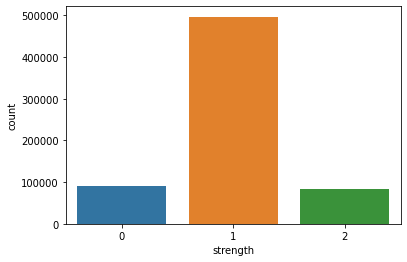

In [9]:
# check if data is imbalanced
sns.countplot(data['strength'])

In [10]:
password_tuple = np.array(data)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [11]:
random.shuffle(password_tuple)

In [12]:
x = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]

In [13]:
len(x)

669639

## Data Cleaning

In [14]:
# convert into characters to pass it into tfidf
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [15]:
word_divide_char(x[0])

['k', 'z', 'd', 'e', '5', '5', '7', '7']

## TF-IDF

In [16]:
vectorizer = TfidfVectorizer(tokenizer=word_divide_char)

In [17]:
X = vectorizer.fit_transform(x)

In [18]:
X.shape

(669639, 125)

In [19]:
vectorizer.get_feature_names() # index
first_doc_vec = X[0]
first_doc_vec

<1x125 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [20]:
first_doc_vec.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56747808],
        [0.        ],
        [0.59091185],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [21]:
df = pd.DataFrame(first_doc_vec.T.todense(), index=vectorizer.get_feature_names(), columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'], ascending=False)

,TF-IDF
7,0.590912
5,0.567478
z,0.336135
k,0.291978
d,0.285748
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


## Model Training

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape

(535711, 125)

In [24]:
clf = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial')

{'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'},

In [25]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0, solver='saga')

## Evaluation

In [26]:
# on X_test
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 2])

In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 5383 12723    11]
 [ 3869 92729  2615]
 [   23  5073 11502]]


In [28]:
acc = accuracy_score(y_test, y_pred)
acc

0.8184546920733529

In [29]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.58      0.30      0.39     18117
           1       0.84      0.93      0.88     99213
           2       0.81      0.69      0.75     16598

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928



In [30]:
# predict on new data
dt = np.array(['@kagglE29'])
pred = vectorizer.transform(dt)
print(clf.predict(pred))

[1]


In [31]:
def password_strength(pw):
    dt = np.array([pw])
    pw = vectorizer.transform(dt)
    strength = clf.predict(pw)
    print(strength)

In [32]:
password_strength('8988')

[0]
